# Cartopy

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import cartopy

**To start, import a global preciptation reanalysis data set, take the time mean, and plot it with standard matplotlib syntax:**

In [2]:
precip_filename = '../data/precip.mon.mean.nc' # gpcp data set

ncfile = xr.open_dataset(precip_filename)
precip_data = ncfile['precip'].values
precip_lat = ncfile['lat'].values
precip_lon = ncfile['lon'].values

precip_tmean = np.mean(precip_data, axis=0)

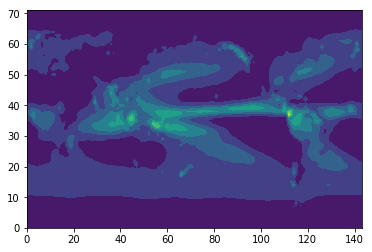

In [3]:
plt.contourf(precip_tmean)

# Use cartopy to place this onto a map

## Cartopy works with the `fig` and `ax` syntax

* **The main difference from a regular plot:**  cartopy also requires a "crs" (coordinate reference system) class to be specified, typically in the form of either a ```projection``` or ```transform``` keyword


* **Issue:**  Sometimes (often?), your data will be in a different projection than the map you want to use to display it
* **Solution:**  Create separate projection objects using what you know about your data and the map you desire to plot


## Steps to create a cartopy map:

1.  Specify the projection of the MAP and DATA separately (`map_crs`, `data_crs`)
2.  Create the `Figure` and `Axes`, and specify the `map_crs` using the `projection` keyword
3.  Then, whenever you create a plot (```ax.contourf()```, etc.), be sure to specify `transform = data_crs` so that cartopy knows what projection your data are in, and then properly transforms it into the map ```crs```

**See the cartopy documentation for projection (crs) options [HERE](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html).**  
Plate Carrée is the typical cylindrical equidistant projection (seen in CMIP model data, global reanalyses, etc.):

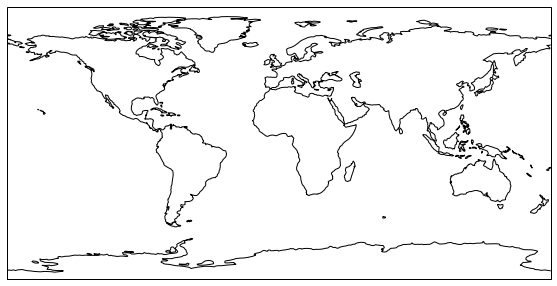

In [4]:
# 1:  specify map and data projections (they can be the same...)
map_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

# 2:  create the fig and ax objects; note the projection= argument
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)
ax.coastlines()

**You can get things like state outlines from [Natural Earth](https://www.naturalearthdata.com/).  Cartopy has a great built-in ```NaturalEarthFeature()``` for this.**  
Note you'll need a connection to the internet to downoad the states and provinces shapefile.

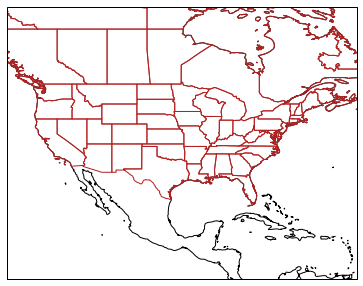

In [5]:
map_crs = cartopy.crs.PlateCarree()
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

ax.set_extent([-130,-60,10,60])
ax.coastlines(resolution='50m') # default is '110m', other options: '50m', '10m'

states_provinces_50m = cartopy.feature.NaturalEarthFeature('cultural',
                                                           name='admin_1_states_provinces',
                                                           scale='50m',
                                                           facecolor='None',
                                                           edgecolor='firebrick')
ax.add_feature(states_provinces_50m)

**Cartopy also has a few automatically built-in features, all at 110m resolution:**

    cartopy.feature.BORDERS
    cartopy.feature.COASTLINE
    cartopy.feature.LAKES
    cartopy.feature.LAND
    cartopy.feature.OCEAN
    cartopy.feature.RIVERS

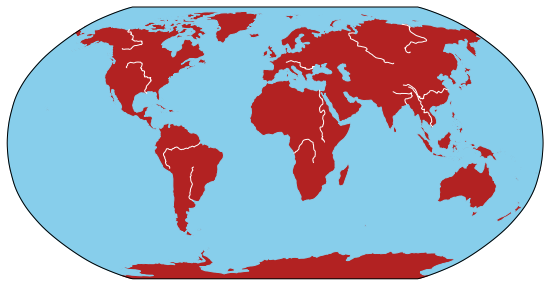

In [6]:
#1: specify map and data projections
map_crs = cartopy.crs.Robinson()
data_crs = cartopy.crs.PlateCarree()

#2: create figure, add projection info
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: use the "ax." syntax to add features
ax.add_feature(cartopy.feature.LAND, facecolor='firebrick')
ax.add_feature(cartopy.feature.OCEAN, facecolor='skyblue')
ax.add_feature(cartopy.feature.RIVERS, edgecolor='white')

**Now add the mean precipitation data set using longitude and latitude data:**

Text(0.5, 1.0, 'mean precipitation from GPCP')

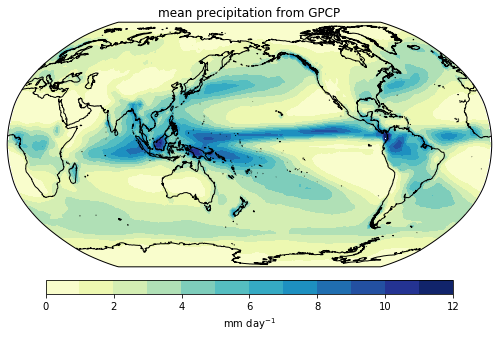

In [7]:
#1: specify projection info
map_crs = cartopy.crs.Robinson(central_longitude=180.)
data_crs = cartopy.crs.PlateCarree()

#2: create figure and axes objects
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)

#3: add coastlines
ax.coastlines(resolution='50m') # res can be '110m', '50m', or '10m'

#3: add contour level information and plot
contour_levels = np.arange(0,12.1,1)

contour_plot = ax.contourf(precip_lon, 
                           precip_lat, 
                           precip_tmean,  
                           cmap='YlGnBu',
                           levels=contour_levels,
                           transform=data_crs)

# contour_lines = ax.contour(precip_lon,
#                            precip_lat,
#                            precip_tmean,
#                            levels=contour_levels,
#                            transform=data_crs,
#                            linewidths=[0.5],
#                            colors=['0.1'])

# add final touches:  color bars, titles
cbar = fig.colorbar(contour_plot, orientation='horizontal', fraction=.05, aspect=30, pad=.05)
cbar.set_label('mm day$^{-1}$')
ax.set_title('mean precipitation from GPCP')

**As long as the map and data projections are correct, cartopy can handle the necessary projections.  For example, we can also take a lat/lon subset and overlay it on a global plot:**

In [8]:
# take a north american-only subset of precip
precip_data_small = ncfile['precip'].sel(lat=slice(10,60), lon=slice(230,300)).values
precip_lat_small = ncfile['lat'].sel(lat=slice(10,60)).values
precip_lon_small = ncfile['lon'].sel(lon=slice(230,300)).values

precip_tmean_small = np.mean(precip_data_small, axis=0)

Text(0.5, 1.0, 'mean precipitation from GPCP')

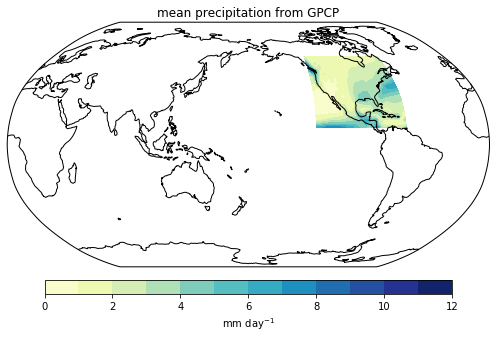

In [9]:
map_crs = cartopy.crs.Robinson(central_longitude=180.)
data_crs = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection=map_crs)
ax.coastlines()

# create an array of the contour levels to plot
contour_levels = np.arange(0,12.1,1)

contour_plot = ax.contourf(precip_lon_small, 
                           precip_lat_small, 
                           precip_tmean_small,  
                           cmap='YlGnBu',
                           levels=contour_levels,
                           transform=data_crs)

cbar = fig.colorbar(contour_plot, orientation='horizontal', fraction=.05, aspect=30, pad=.05)
cbar.set_label('mm day$^{-1}$')

ax.set_global()

ax.set_title('mean precipitation from GPCP')

# Key points

* Creating a cartopy plot is similar to creating a regular figure

* The main thing to keep in mind is creating a coordinate reference system for your data and map, and being careful about where to specify these in the plotting syntax

**regular figure**

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.contourf(lon, lat, data)
    
    ax.set_xlim(xlow, xhigh)
    ax.set_ylim(ylow, yhigh)
    ...

**cartopy map figure**

    fig = plt.figure()
    ax = fig.add_subplot(111, projection=map_crs)
    ax.contourf(lon, lat, data, transform=data_crs)
    
    ax.coastlines()
    ax.set_extent([lon_low, lon_high, lat_low, lat_high])
    ...

* To get things like physical or cultural boundaries, or other types of shapefile information, [Natural Earth](https://www.naturalearthdata.com/) hosts a LOT of goodies.  Cartopy has methods to import these data sets directly.

## Next week

* More on projections (and adding external shapefiles to plots)
* Coaxing satellite data into python